In [1]:
#Importing necessary Liberaries to commence the Predictive Model with Python programming
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
#from kaggle.datasets import fetch_california_housing
#import plotly.express as px
#import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

In [2]:
#Loading the dataset "Finding Donors for Charity" retreived from kaggle.com
prediction_data=pd.read_csv("census.csv")
prediction_data

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


In [3]:
#The column named income is our target variable which we want to predict). 
#The two possible incomes are <= 50K (low-revenue) and > 50K (high-revenue). 
#The resulting prediction problem is therefore a binary classification problem, 
#while we will use the other columns as input variables for our model.

prediction_data.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [4]:
prediction_data.income

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
5        <=50K
6        <=50K
7         >50K
8         >50K
9         >50K
10        >50K
11        >50K
12       <=50K
13       <=50K
14       <=50K
15       <=50K
16       <=50K
17       <=50K
18        >50K
19        >50K
20       <=50K
21       <=50K
22       <=50K
23       <=50K
24        >50K
25       <=50K
26       <=50K
27       <=50K
28       <=50K
29       <=50K
         ...  
45192    <=50K
45193    <=50K
45194     >50K
45195     >50K
45196    <=50K
45197     >50K
45198     >50K
45199    <=50K
45200    <=50K
45201    <=50K
45202    <=50K
45203    <=50K
45204     >50K
45205    <=50K
45206    <=50K
45207    <=50K
45208    <=50K
45209    <=50K
45210    <=50K
45211    <=50K
45212    <=50K
45213    <=50K
45214    <=50K
45215    <=50K
45216    <=50K
45217    <=50K
45218    <=50K
45219    <=50K
45220    <=50K
45221     >50K
Name: income, Length: 45222, dtype: object

In [5]:
#Number of records on the dataset
n_records = prediction_data.shape[0]

#Records of individual's income above $50,000
n_greater_50k = prediction_data.query('income == ">50K"').shape[0]

# Records of individual's income upto $50,000
n_at_most_50k = prediction_data.query('income == "<=50K"').shape[0]

# Percentage of individual's income is above $50,000
greater_percent = (prediction_data.query('income == ">50K"').shape[0]/prediction_data.shape[0])*100

# Print the results
print("Number of records on the dataset: {}".format(n_records))
print("Records of individual's income above $50,000: {}".format(n_greater_50k))
print("Records of individual's income upto $50,000: {}".format(n_at_most_50k))
print("Percentage of individual's income above $50,000: {:.2f}%".format(greater_percent))

Number of records on the dataset: 45222
Records of individual's income above $50,000: 11208
Records of individual's income upto $50,000: 34014
Percentage of individual's income above $50,000: 24.78%


In [6]:
target_column = 'income'
prediction_data[target_column].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

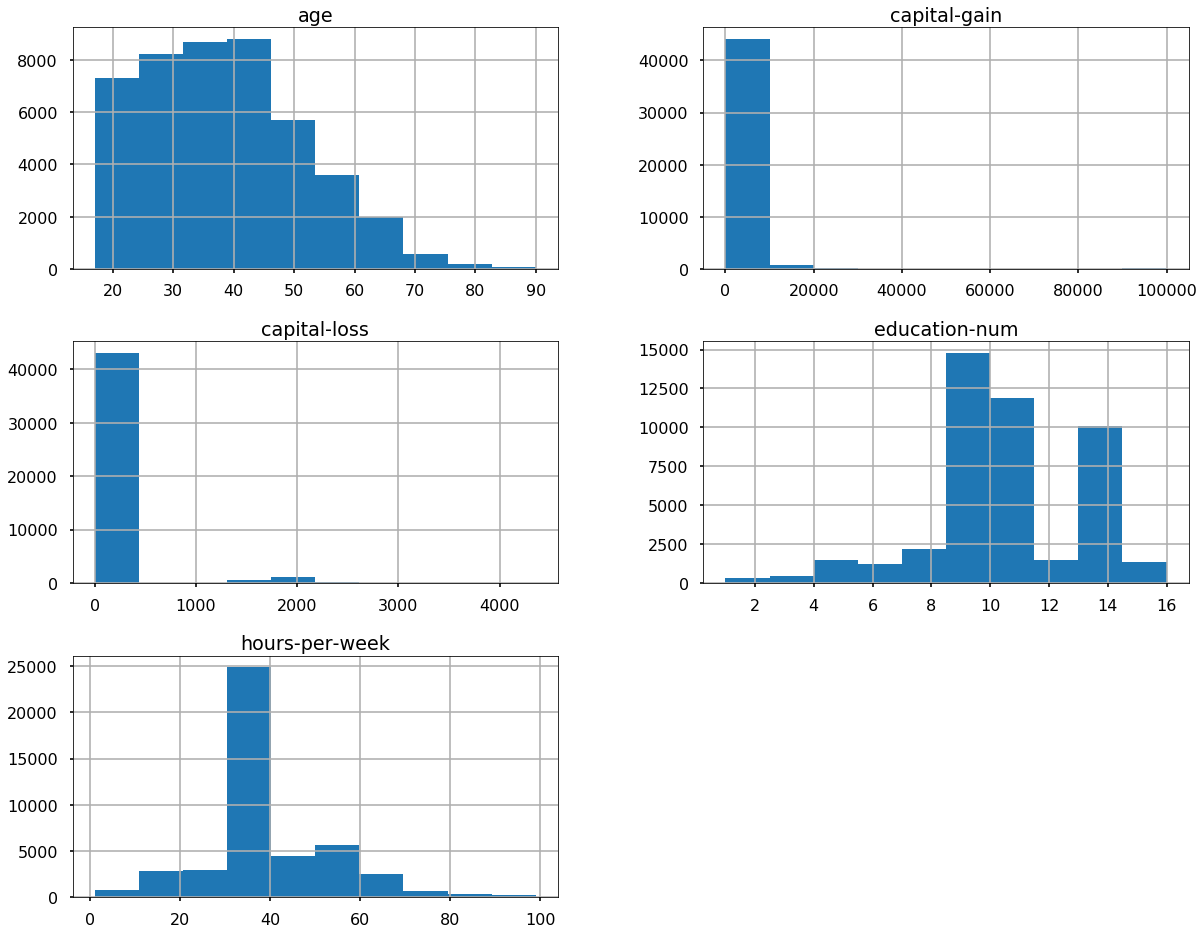

In [7]:
sns.set_context("poster")

_= prediction_data.hist(figsize=(20, 16))

In [8]:
prediction_data['sex'].value_counts()

 Male      30527
 Female    14695
Name: sex, dtype: int64

In [9]:
prediction_data['education-num'].value_counts()

9.0     14783
10.0     9899
13.0     7570
14.0     2514
11.0     1959
7.0      1619
12.0     1507
6.0      1223
4.0       823
15.0      785
5.0       676
8.0       577
16.0      544
3.0       449
2.0       222
1.0        72
Name: education-num, dtype: int64

#Trying to plot n_sample of the dataset
n_samples = 5000
columns = ['age', 'education-num', 'hours-per-week']
_ = sns.pairplot(data=prediction_data[:n_samples_to_plot], vars=columns,
                 hue=target_column, plot_kws={'alpha': 0.2},
                 diag_kind='hist', diag_kws={'bins': 30})

In [10]:
#We can proceed to work on the variables and denominated features to build our predictive model.
#Before then, It is necessary to check how many samples are available in our dataset after separation of our target y.
#Note that the income column is no more in the list below.
prediction_data.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [11]:
prediction_data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [12]:
#Extractions of only Numerical features to build our first model

Numerics_only = prediction_data.select_dtypes(include=np.number)
Numerics_only.head()

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13.0,2174.0,0.0,40.0
1,50,13.0,0.0,0.0,13.0
2,38,9.0,0.0,0.0,40.0
3,53,7.0,0.0,0.0,40.0
4,28,13.0,0.0,0.0,40.0


In [13]:
#Seperating our target y from the dataset
target_name = "income"
target = prediction_data[target_name]
target.head(10)

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
5    <=50K
6    <=50K
7     >50K
8     >50K
9     >50K
Name: income, dtype: object

In [14]:
#We deleted the income column since its our prediction target y in this work.
prediction_data = prediction_data.drop(columns=[target_name])
prediction_data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba


In [15]:
#Visualising the samples and features to use in building our predictive model
print(f"The new dataset after separation of our target contains {Numerics_only.shape[0]} samples and "
      f"{Numerics_only.shape[1]} features")

The new dataset after separation of our target contains 45222 samples and 5 features


In [16]:
Numerics_only.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [17]:
#Fiting a classification model using the “K-nearest neighbors” strategy. 
#This fit method is called to train the model from the input (features) and target data 
#using Kneighbour classifiers imported from sklearn libreries.
model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
model.fit(Numerics_only, target)

KNeighborsClassifier(n_jobs=1)

In [18]:
#Application of prediction model on only the Numerical features
#The model uses a prediction function that will use the input data together with the model states. 
#As for the learning algorithm and the model states, the prediction function is specific for each type of model.
target_predicted = model.predict(Numerics_only)

In [19]:
#Predicted new numerical features with the prediction model.
#Showing 10 predictions computed for simplicity.
target_predicted[:10]

array(['<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K',
       '<=50K', '>50K', '>50K'], dtype=object)

In [20]:
#In comparing these predictions to the actual data on the dataset
target[:10]

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
5    <=50K
6    <=50K
7     >50K
8     >50K
9     >50K
Name: income, dtype: object

In [21]:
#Trying to confirm if the two datas agreed or not.
target[:20] == target_predicted[:20]

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7     False
8      True
9      True
10     True
11    False
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
Name: income, dtype: bool

In [22]:
#Printing the comparism for better assessment.
print(f"Number of correct prediction: "
      f"{(target[:100] == target_predicted[:100]).sum()}/100")

Number of correct prediction: 89/100


In [23]:
#Shwing an average rate for better assessment
(target == target_predicted).mean()

0.842001680597939

In [24]:
#Trying to reload the dataset 
#for application of train-test-split function
prediction_data2=pd.read_csv("census.csv")
prediction_data2.head(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [25]:
#Splitting the dataset into X and Y variables
#Y = prediction_data.income
#Y.head(3)
prediction_data_test = prediction_data2.drop(columns=['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])
prediction_data_test.head(5)

,age,education-num,capital-gain,capital-loss,hours-per-week,income
0,39,13.0,2174.0,0.0,40.0,<=50K
1,50,13.0,0.0,0.0,13.0,<=50K
2,38,9.0,0.0,0.0,40.0,<=50K
3,53,7.0,0.0,0.0,40.0,<=50K
4,28,13.0,0.0,0.0,40.0,<=50K


In [26]:
target_test = prediction_data_test[target_name]
data_test = prediction_data_test.drop(columns=[target_name ])
data_test.head(5)

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13.0,2174.0,0.0,40.0
1,50,13.0,0.0,0.0,13.0
2,38,9.0,0.0,0.0,40.0
3,53,7.0,0.0,0.0,40.0
4,28,13.0,0.0,0.0,40.0


In [27]:
X = data_test
X.head()

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13.0,2174.0,0.0,40.0
1,50,13.0,0.0,0.0,13.0
2,38,9.0,0.0,0.0,40.0
3,53,7.0,0.0,0.0,40.0
4,28,13.0,0.0,0.0,40.0


In [28]:
data_test.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [29]:
target_name = "income"
target = prediction_data2[target_name]
target.head(10)

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
5    <=50K
6    <=50K
7     >50K
8     >50K
9     >50K
Name: income, dtype: object

In [30]:
Y = target
Y.head(10)

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
5    <=50K
6    <=50K
7     >50K
8     >50K
9     >50K
Name: income, dtype: object

In [31]:
print(f"The testing dataset contains {data_test.shape[0]} samples and "
      f"{data_test.shape[1]} features")

The testing dataset contains 45222 samples and 5 features


In [32]:
X.shape, Y.shape

((45222, 5), (45222,))

In [33]:
#Application of data_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [34]:
#Checking data dimension
X_train.shape, Y_train.shape

((36177, 5), (36177,))

In [35]:
X_test.shape, Y_test.shape

((9045, 5), (9045,))

In [36]:
#Building Linear Regression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [37]:
model.fit(X_train, Y_train)

LogisticRegression()

In [38]:
accuracy = model.score(X_test, Y_test)
print(f"Logistic regression accuracy is : {accuracy:.3f}")

Logistic regression accuracy is : 0.812


In [39]:
Y_test.head(5)

20084     >50K
20027    <=50K
39505    <=50K
39534    <=50K
12586     >50K
Name: income, dtype: object

In [40]:
X_train.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,36177.000000,36177.000000,36177.000000,36177.000000,36177.000000
mean,38.558283,10.117091,1089.335766,87.182962,40.952318
std,13.232872,2.554611,7519.871123,401.695413,11.988401
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [41]:
target.head(5)

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

In [42]:
data_test_train, data_test_test, target_train, target_test = train_test_split(
    Numerics_only, target, random_state=42)

In [43]:
data_test_train.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,33916.000000,33916.000000,33916.000000,33916.000000,33916.000000
mean,38.565043,10.118410,1086.904322,87.633536,40.944245
std,13.237835,2.557794,7528.518876,402.738787,12.010376
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data_train = scaler.fit_transform(data_test_train)
scaled_data_train

array([[-1.02473278, -0.04629455,  0.14439915, -0.21759719, -0.07862023],
       [ 0.33502627,  1.12660839, -0.14437373, -0.21759719, -0.07862023],
       [-1.25135929,  0.3446731 , -0.14437373, -0.21759719, -0.07862023],
       ...,
       [-0.57147977, -0.04629455, -0.14437373, -0.21759719, -0.07862023],
       [-0.11822675, -0.4372622 , -0.14437373, -0.21759719,  4.83387112],
       [ 1.31707448, -1.2191975 , -0.14437373, -0.21759719, -0.07862023]])

In [45]:
scaled_data_train = pd.DataFrame(scaled_data_train,
                                 columns=data_test_train.columns)
scaled_data_train.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,3.391600e+04,3.391600e+04,3.391600e+04,3.391600e+04,3.391600e+04
mean,3.744826e-18,1.618838e-15,5.391530e-15,1.003427e-15,6.997006e-16
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.629070e+00,-3.565003e+00,-1.443737e-01,-2.175972e-01,-3.325860e+00
25%,-7.981063e-01,-4.372622e-01,-1.443737e-01,-2.175972e-01,-7.862023e-02
50%,-1.182267e-01,-4.629455e-02,-1.443737e-01,-2.175972e-01,-7.862023e-02
75%,6.371949e-01,1.126608e+00,-1.443737e-01,-2.175972e-01,3.376926e-01
max,3.885508e+00,2.299511e+00,1.313851e+01,1.059851e+01,4.833871e+00


In [46]:
import time
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())
start = time.time()
model.fit(data_test_train, target_train)
elapsed_time = time.time() - start

In [47]:
model_name = model.__class__.__name__
score = model.score(data_test_test, target_test)
print(f"The accuracy using a {model_name} is {score:.3f} "
      f"with a fitting time of {elapsed_time:.3f} seconds "
      f"in {model[-1].n_iter_[0]} iterations")

The accuracy using a Pipeline is 0.812 with a fitting time of 0.131 seconds in 13 iterations


In [48]:
#We compared this model with the predictive 
#model used before that was not scaled.
model = LogisticRegression()
start = time.time()
model.fit(X_train, Y_train)
elapsed_time = time.time() - start

In [49]:
model_name = model.__class__.__name__
score = model.score(X_test, Y_test)
print(f"The accuracy using a {model_name} is {score:.3f} "
      f"with a fitting time of {elapsed_time:.3f} seconds "
      f"in {model.n_iter_[0]} iterations")

The accuracy using a LogisticRegression is 0.812 with a fitting time of 0.552 seconds in 81 iterations


In [52]:
#Model evaluation using cross-validation¶
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), LogisticRegression())
cv = cross_validate(model, X, Y, cv=5)
cv

{'fit_time': array([0.12930727, 0.18379164, 0.18415284, 0.18402338, 0.1949029 ]),
 'score_time': array([0.03557038, 0.03506994, 0.03488159, 0.0352819 , 0.03538203]),
 'test_score': array([0.80552792, 0.80851299, 0.81346749, 0.81015038, 0.80395843])}

In [53]:
scores = cv["test_score"]
print(f"The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

The mean cross-validation accuracy is: 0.808 +/- 0.003
